In [376]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [377]:
data = pd.read_csv('/kaggle/input/heartdata/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [379]:
transform = {
    1 : 'heart disease',
    0: 'normal'
}

In [380]:
data['HeartDisease'] = data['HeartDisease'].map(transform)
data['HeartDisease'].value_counts()

HeartDisease
heart disease    508
normal           410
Name: count, dtype: int64

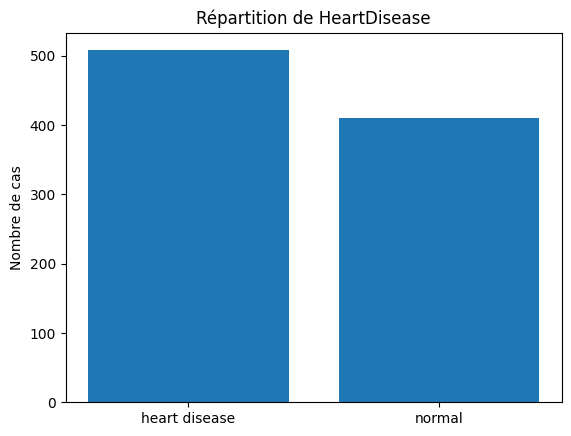

In [381]:
counts = data['HeartDisease'].value_counts()
plt.bar(counts.index, counts.values)
plt.title("Répartition de HeartDisease")
plt.ylabel("Nombre de cas")
plt.show()

In [382]:
reverse_transform = {
    'heart disease': 1,
    'normal': 0
}
data['HeartDisease'] = data['HeartDisease'].map(reverse_transform)
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [383]:
print(data['Sex'].value_counts())
sex = {
    'M': 1,
    'F': 0
}
data['Sex'] = data['Sex'].map(sex)
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64


Sex
1    725
0    193
Name: count, dtype: int64

In [384]:
print(data['ChestPainType'].value_counts())
ChestPainType = {
    'ASY': 0,
    'NAP': 1,
    'ATA': 2,
    'TA': 3
    
}
data['ChestPainType'] = data['ChestPainType'].map(ChestPainType)
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


ChestPainType
0    496
1    203
2    173
3     46
Name: count, dtype: int64

In [385]:
print(data['RestingECG'].value_counts())
RestingECG = {
    'Normal': 0,
    'LVH': 1,
    'ST': 2
    
}
data['RestingECG'] = data['RestingECG'].map(RestingECG)
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


RestingECG
0    552
1    188
2    178
Name: count, dtype: int64

In [386]:
print(data['ExerciseAngina'].value_counts())
ExerciseAngina = {
    'N': 0,
    'Y': 1  
}
data['ExerciseAngina'] = data['ExerciseAngina'].map(ExerciseAngina)
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64


ExerciseAngina
0    547
1    371
Name: count, dtype: int64

In [387]:
print(data['ST_Slope'].value_counts())
ST_Slope = {
    'Flat': 0,
    'Up': 1,
    'Down': 2
    
}
data['ST_Slope'] = data['ST_Slope'].map(ST_Slope)
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


ST_Slope
0    460
1    395
2     63
Name: count, dtype: int64

In [388]:
data.info()
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [389]:
X = data.drop(columns=['HeartDisease'])
Y = data['HeartDisease']
X.info()
print('#'*50)
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 79.0 KB
##################################################
<class 'pandas.core.series.Series'>
RangeIndex: 918 entries, 0 to 917
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
918 non-null    int64
dtypes: int64(1)
memory usage: 7.3 KB


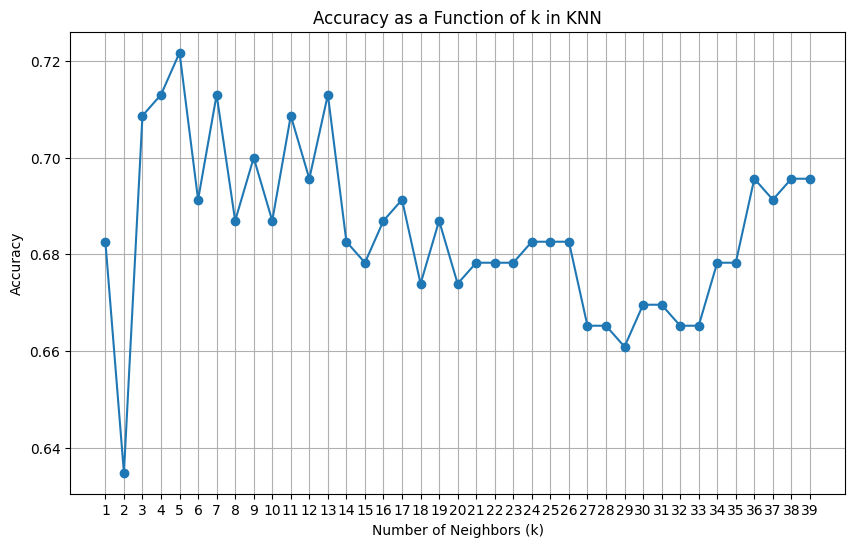

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
accuracies = []
k_range = range(1, 40)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title("Accuracy as a Function of k in KNN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [391]:
best_k = k_range[accuracies.index(max(accuracies))]
print(f"Best k : {best_k} with Accuracy {max(accuracies):.2f}")

Best k : 5 with Accuracy 0.72
